In [1]:
#%matplotlib inline
import scipy
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

# <font color='green'>Troisième partie: Arbres de décision vs. Forêts aléatoires

##   <font color='blue'>Etape 1. Visualiser la base de chiffres manuscrits


[0 1 2 3 4 5 6 7 8 9]
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


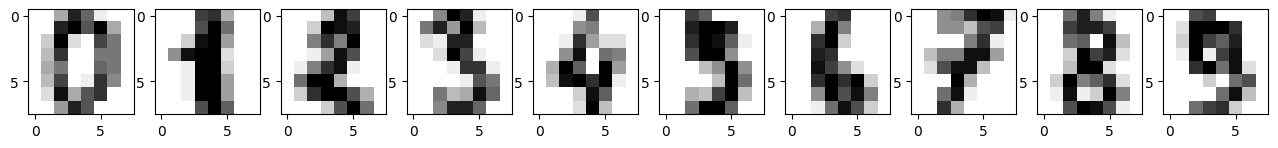

n_samples: [178 182 177 183 181 182 181 179 174 180]


In [2]:
from sklearn.datasets import load_digits

# Load Iris dataset
digits = load_digits()

## print the label species(setosa, versicolor,virginica)
print(digits.target_names)
## print the names of the four features
print(digits.feature_names)

# Affichage des 10 premières images
fig = plt.figure(figsize=(16,6))
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit, cmap='binary')
plt.show()

print("n_samples: %s" % np.bincount(digits.target))

## Travail d'analyse
- Déterminer les descripteurs, les classes et le nombre d'exemples par classe.
- Donner un avis sur la qualité des données en comparaisant à la base MNIST exploitée pour le TP clustering.

##   <font color='blue'> Etape 2. Classification multi-classes avec un Arbres de Décision

In [3]:
from sklearn import tree

#Accuracy of the model on the whole dataset
X, y = digits.data, digits.target
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
accuracy = clf.score(X,y)

print("Accuracy value:","%.0f" %(100*accuracy),"%")

Accuracy value: 100 %


## Travail d'analyse
- Expliquer la valeur de performance obtenue.

### Dans ce qui suit, partager la base en deux sous-ensemble, apprentissage et test

In [4]:
from sklearn.model_selection import train_test_split
# 90% of data in the test, 10% for the training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

Z = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print("Accuracy value:","%.2f" %(100*accuracy),"%")

Accuracy value: 82.76 %


## Travail d'analyse
- Exécuter la fonction ci-dessus 10 fois. Discuter.
- En appliquant 100 tirages aléatoires de l'ensemble d'apprentissage et de test, évaluer les performances.

In [5]:
N = 100
accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracies.append(clf.score(X_test,y_test))
    #print(accuracies[i])

print("%.3f" %(100*(np.mean(accuracies))),"%")
print("%.3f" %((np.std(accuracies))))

82.425 %
0.009


##   <font color='blue'> Etape 3. Classification avec les Forêts Aléatoires


In [6]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300)
clf.fit(X_train, y_train)
accuracy2 = clf.score(X_test,y_test)
print("Random Forest (300 trees) : ""%.2f" %(100*accuracy2),"%")

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
accuracy1 = clf.score(X_test,y_test)
print("Decision Tree : ""%.2f" %(100*accuracy1),"%")

Random Forest (300 trees) : 96.89 %
Decision Tree : 81.31 %


In [7]:
N = 100
rf_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
    clf = RandomForestClassifier(n_estimators=30)
    clf.fit(X_train, y_train)
    rf_accuracies.append(clf.score(X_test,y_test))

print("%.3f" %(100*(np.mean(rf_accuracies))),"%")
print("%.3f" %((np.std(rf_accuracies))))

95.572 %
0.005


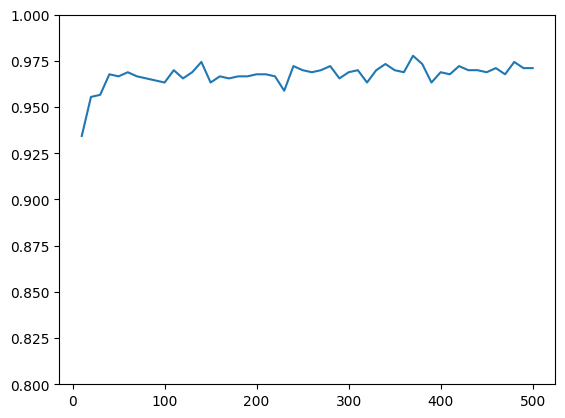

In [8]:
# Plot the graph Accuracy as a function of number of trees
N = 50
accuracy = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

for i in range(N):
    clf = RandomForestClassifier(n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test,y_test))
    #print((i+1)*10, accuracy[i])

plt.plot([10*(i+1) for i in range(50)], accuracy)
plt.ylim((0.8,1))
plt.show()

## Travail d'analyse
- Comparer la performance entre l'arbre de décision et la forêt aléatoire en terme de taux de bonne classification et d'intervalle de confiance. 

- Analyser la courbe de performances obtenue en fonction du nombre d'estimateurs et étudier l'impact de la taille de l'ensemble d'apprentissage.

##   <font color='blue'> Etape 4 :  Classification avec Adaboost

In [9]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost basé sur 200 arbres de décision
clf = AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(max_depth=1), n_estimators=500, learning_rate=0.1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("Accuracy value:","%.2f" %(100*accuracy),"%")

/Users/valentin/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy value: 75.64 %


 ## Travail d'analyse
 - Comparer les performance du Adaboost à la forêt aléatoire et à l'arbre de décision. 
   